# Unidentified anomalous phenomenon - Part II Predictive AI 


Set up a predictive ML case for predicting the best spoting place. 

To answer the question, 'In New York City on Monday, in what direction from the city i best spoting placen

The training parameters include the day of the week (two categories), cities (four categories), distance from the center (three categories), and direction (eight categories). In other words, there are binary outcomes and five categorical parameters.a.

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import folium
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")
os.chdir('/Users/46763/Desktop/Project/ufo')

## Data Preprocessing*
Read excel file and romove bad data and make small dataset 

In [2]:
# Unidentified_anomalous_phenomenon = pd.read_csv('unidentified_anomalous_phenomenon.csv')
unidentified_anomalous_phenomenon = pd.read_excel('excel_unidentified_anomalous_phenomenon.xlsx')

# clean columns names
unidentified_anomalous_phenomenon.columns =  unidentified_anomalous_phenomenon.columns.str.replace(r'\W+', '', regex=True)
unidentified_anomalous_phenomenon.rename(columns={'Kolumn1': 'SpottingTime'}, inplace=True)
# Sort by date 
unidentified_anomalous_phenomenon.sort_values(by=['SpottingTime'], inplace=True)
unidentified_anomalous_phenomenon.columns = [''.join(filter(str.isalnum, col)) for col in unidentified_anomalous_phenomenon.columns]


In [3]:

# Fix data type 
unidentified_anomalous_phenomenon['latitude'] = pd.to_numeric(unidentified_anomalous_phenomenon['latitude'], errors='coerce')

### Fliter states and new dates
ca,wa,fl ,tx    
ny    

In [4]:
states = ['ca', 'wa', 'fl' , 'tx', 'nv']
feature_engineering_df = unidentified_anomalous_phenomenon[(unidentified_anomalous_phenomenon.state.isin(states))  &
                                                            (unidentified_anomalous_phenomenon.SpottingTime > '1993-09-10')]
feature_engineering_df['Old_Index'] = feature_engineering_df.index
feature_engineering_df.sort_values(by='SpottingTime', inplace=True)
feature_engineering_df.reset_index(drop=True, inplace=True)
feature_engineering_df.head (3)

,SpottingTime,city,state,country,shape,durationseconds,durationhoursmin,comments,dateposted,latitude,longitude,Old_Index
0,1993-09-15 16:00:00,reno,nv,us,formation,45.0,45 seconds,Daytime sighting over Reno airport of formatio...,2003-03-21,39.529722,-119.812778,74665
1,1993-09-15 18:00:00,bishop,ca,us,sphere,600.0,5-10 minutes,Large sphere witnessed at music festival.,2008-03-31,37.363611,-118.394167,74666
2,1993-09-15 21:00:00,san francisco,ca,us,circle,240.0,3 to 4 minutes,Round shiny object emitting three rows of blue...,2005-05-24,37.775000,-122.418333,74668


## Feature Engineering

### Week & Month

In [5]:
feature_engineering_df['Weekday'] = feature_engineering_df['SpottingTime'].dt.day_name()
feature_engineering_df['Month'] = feature_engineering_df['SpottingTime'].dt.month_name()


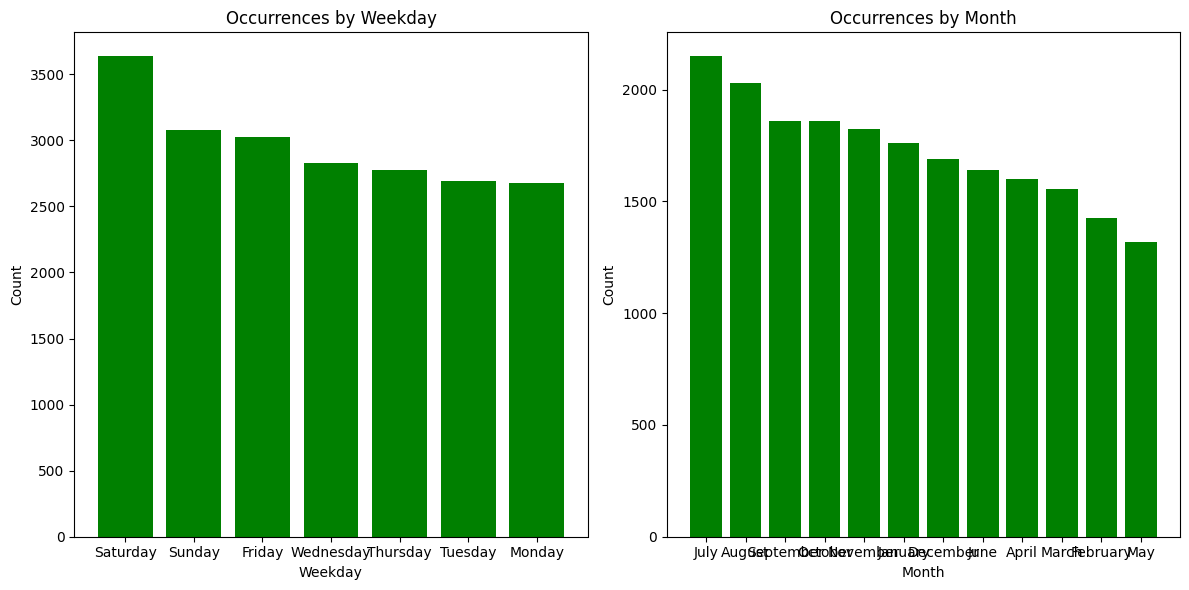

In [6]:
# Count occurrences of weekdays and months
weekday_counts = feature_engineering_df['Weekday'].value_counts()
month_counts = feature_engineering_df['Month'].value_counts()
# Create a figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for weekdays
axes[0].bar(weekday_counts.index, weekday_counts.values, color='green')
axes[0].set_title('Occurrences by Weekday')
axes[0].set_xlabel('Weekday')
axes[0].set_ylabel('Count')

# Plot for months
axes[1].bar(month_counts.index, month_counts.values, color='green')
axes[1].set_title('Occurrences by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### distance from the center
### Import lib

In [7]:
from math import radians, sin, cos, sqrt, atan2
import math

def calculate_range_and_degree(lat1, lon1, lat2, lon2):

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)
    
    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Calculate the range (distance between the two points) in kilometers
    range_km = R * c
    
    long1 = lon1
    long2 = lon2
    dLon = (long2 - long1)
    x = math.cos(math.radians(lat2)) * math.sin(math.radians(dLon))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(math.radians(dLon))
    brng = np.arctan2(x,y)
    degree = np.degrees(brng)
    degree = degree +160
    
     # Categorize the range
    range_category =''
    if range_km < 80:
        range_category = 'low'
    elif 80 <= range_km <= 250:
        range_category = 'medium'
    else:
        range_category = 'high'
    
    # Determine direction
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']
    index = int((degree + 22.5) / 45) % 8
    direction = directions[index]
    
    return range_km, degree, range_category, direction

# Function to calculate range, degree, range category, and direction for each row
def calculate_range_and_degree_fixed(latFixed,lonFixed, lat, lon):
    return calculate_range_and_degree(latFixed, lonFixed, lat, lon)


In [83]:

# ['ca', 'wa', 'fl' , 'tx', 'nv']
california_df = feature_engineering_df[feature_engineering_df.state == 'ca']
washington_df = feature_engineering_df[feature_engineering_df.state == 'wa']
florida_df = feature_engineering_df[feature_engineering_df.state == 'fl']
texas_df =  feature_engineering_df[feature_engineering_df.state == 'tx']
nevada_df =  feature_engineering_df[feature_engineering_df.state == 'nv']

In [85]:
texas_df

,SpottingTime,city,state,country,shape,durationseconds,durationhoursmin,comments,dateposted,latitude,longitude,Old_Index,Weekday,Month
6,1993-11-15 14:30:00,encinal (northeast of),tx,us,rectangle,3600.0,1 hour,Large mother ship sighting and smaller UFO cha...,2003-09-17,28.040833,-99.354167,9366,Monday,November
8,1993-12-01 14:00:00,arlington,tx,us,oval,600.0,5 to 10 minutes,Enormous UFO Arlington&#44 Texas,2006-05-15,32.735556,-97.107778,17262,Wednesday,December
27,1994-04-01 15:00:00,megargel,tx,us,unknown,600.0,10 minutes,Missing Time: 10 minutes erased from my life,2001-11-20,33.450833,-98.924167,36038,Friday,April
39,1994-06-01 02:00:00,atlanta,tx,us,other,14400.0,4 hours,We saw a giant ball of light and lighting and ...,2000-12-02,33.113611,-94.164167,47556,Wednesday,June
44,1994-06-04 10:00:00,galveston,tx,us,triangle,2.0,a few seconds,Previous Stealth sighting in Williamsburg area,2002-12-23,29.301111,-94.797500,53440,Saturday,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20696,2014-05-01 23:15:00,denton,tx,us,formation,600.0,10 minutes,Strobe of 5 lights hovering over Corinth area.,2014-05-02,33.214722,-97.132778,41813,Thursday,May
20697,2014-05-02 05:40:00,mission,tx,us,triangle,1800.0,20-30 minutes,Two triangular objects that were in a haze tha...,2014-05-08,26.215556,-98.325000,43767,Friday,May
20700,2014-05-03 20:54:00,spring,tx,us,sphere,1800.0,30 minutes,20+ glowing orbs seen over 30 minute period in...,2014-05-08,30.079722,-95.416944,45431,Saturday,May
20703,2014-05-03 23:11:00,mckinney,tx,us,triangle,6.0,5-6 seconds,Beautiful night me and my wife were going to s...,2014-05-08,33.197500,-96.615000,45448,Saturday,May


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import datetime


## Train model with RandomForestClassifier from sklearn   
### Import lib

### neural_network_model_fx

In [62]:
def neural_network_model_fx (indata_train, nameOfModelFile):
    '''
    indata_train all data in 
    output  indata_train all plus fit_transform
    output files json and Encoders.pkl in sub cat  models
    '''
    nameOfModelFileJson = './models/' + nameOfModelFile + '.json'
    nameOfLabelEncoders = './models/' + nameOfModelFile + 'Encoders.pkl'
    print ('-------------------------------------------Start' + nameOfModelFileJson) 
    label_encoders = {}
    for col in ['Weekday', 'Month', 'Target_RaCaDi']:
        label_encoders[col] = LabelEncoder()
        indata_train[col] = label_encoders[col].fit_transform(indata_train[col])


    # Split data into features and target
    X = indata_train[['Weekday', 'Month']]
    y = indata_train['Target_RaCaDi']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the neural network model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(len(label_encoders['Target_RaCaDi'].classes_), activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    # Save the model
    #joblib.dump(model, (nameOfModelFile))
    #model.save('nevad_model.h5')
    
    # Save the model architecture
    model_json = model.to_json()
    with open(nameOfModelFileJson, 'w') as json_file:
        json_file.write(model_json)

    # Save label encoders or any other necessary objects
    joblib.dump(label_encoders, nameOfLabelEncoders)

    print ('---------------------------------------')

    # Predict outcome for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = [label_encoders['Target_RaCaDi'].inverse_transform([pred.argmax()])[0] for pred in y_pred]
    
    # Convert numerical labels back to categorical values for 'Weekday' and 'Month' columns
    X_test['Weekday'] = label_encoders['Weekday'].inverse_transform(X_test['Weekday'])
    X_test['Month'] = label_encoders['Month'].inverse_transform(X_test['Month'])
    
    # Create a DataFrame with the input parameters, actual, and predicted outcomes
    results_df = pd.DataFrame({'Weekday': X_test['Weekday'],
                               'Month': X_test['Month'],
                               'Actual': label_encoders['Target_RaCaDi'].inverse_transform(y_test),
                               'Predicted': y_pred_classes})

    return results_df

In [87]:
# Apply the function to each row of the DataFrame
# San Francisco, CA, USA is 37.773972, and the longitude is -122.431297. 
latFixed = 37.773972
lonFixed =  -122.431297
california_df[['Range', 'Degree', 'RangeCategory', 'Direction']] = california_df.apply(lambda row: calculate_range_and_degree_fixed(latFixed, lonFixed,row['latitude'], row['longitude']), axis=1, result_type='expand')
#  Seattle, WA, USA is 47.608013, and the longitude is -122.335167. 
latFixed = 47.608013
lonFixed =  -122.335167
washington_df[['Range', 'Degree', 'RangeCategory', 'Direction']] = washington_df.apply(lambda row: calculate_range_and_degree_fixed(latFixed, lonFixed,row['latitude'], row['longitude']), axis=1, result_type='expand')
#  florida Orlando, United States: Decimal lat-long coordinates are 28.53834, -81.37924.
latFixed = 28.53834
lonFixed =  -81.37924
florida_df[['Range', 'Degree', 'RangeCategory', 'Direction']] = florida_df.apply(lambda row: calculate_range_and_degree_fixed(latFixed, lonFixed,row['latitude'], row['longitude']), axis=1, result_type='expand')
florida_df['Target_RaCaDi'] = florida_df.RangeCategory + florida_df.Direction
florida_train = florida_df[['Weekday','Month','Target_RaCaDi']]
florida_train = neural_network_model_fx (florida_train,'florida_model_NN003') 

#  Dallas Latitude and longitude coordinates are: 32.779167, -96.808891. Dallas,
latFixed = 32.779167
lonFixed = -96.808891
texas_df[['Range', 'Degree', 'RangeCategory', 'Direction']] = texas_df.apply(lambda row: calculate_range_and_degree_fixed(latFixed, lonFixed,row['latitude'], row['longitude']), axis=1, result_type='expand')
texas_df['Target_RaCaDi'] = texas_df.RangeCategory + texas_df.Direction
texas_train = texas_df[['Weekday','Month','Target_RaCaDi']]
texas_train = neural_network_model_fx (texas_train,'texas_model_NN003') 

# Las Vegas, NV, USA is 36.188110, and the longitude is -115.176468
latFixed = 36.188110
lonFixed = -115.176468
nevada_df[['Range', 'Degree', 'RangeCategory', 'Direction']] = nevada_df.apply(lambda row: calculate_range_and_degree_fixed(latFixed, lonFixed,row['latitude'], row['longitude']), axis=1, result_type='expand')
nevada_df['Target_RaCaDi'] = nevada_df.RangeCategory + nevada_df.Direction
nevada_train = nevada_df[['Weekday','Month','Target_RaCaDi']]
nevada_train = neural_network_model_fx (nevada_train,'nevada_model_NN003') 


-------------------------------------------Start./models/florida_model_NN003.json
Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.1898 - loss: 2.8776
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.2152 - loss: 2.5358
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.1999 - loss: 2.5106
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.1985 - loss: 2.5316
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.1894 - loss: 2.5394
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.1979 - loss: 2.5225
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.1879 - loss: 2.4925
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.2036 - loss: 2.4835
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.1965 - loss: 2.5003
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.2018 - loss: 2.4640
---------------------------------------
25/25 ━━━━━━━━━━━

In [82]:
texas_train

,Weekday,Month,Actual,Predicted
14077,Saturday,April,highN,highN
8445,Saturday,October,lowSW,highN
15257,Monday,February,lowSE,highN
2348,Friday,October,mediumW,highNW
17519,Saturday,August,highN,highN
...,...,...,...,...
5942,Thursday,September,lowE,highN
5482,Saturday,May,lowE,highN
3280,Sunday,October,highN,highN
5152,Sunday,December,highNE,highN


In [79]:
# Split data into features and target
X = nevada_train[['Weekday', 'Month']]
y = nevada_train['Target_RaCaDi']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoders['Target_RaCaDi'].classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
# Save the model
joblib.dump(model, 'nevad_model_neural_network_model.pkl')


KeyError: 'Target_RaCaDi'

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4833 - loss: 1.7979 
Accuracy: 0.473053902387619


In [41]:
# Split data into features and target
X = nevada_train[['Weekday', 'Month']]
y = nevada_train['Target_RaCaDi']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
# Save the model
joblib.dump(model, 'nevad_model.pkl')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4251497005988024


In [23]:

# Convert numerical labels back to categorical values for 'Weekday' and 'Month' columns
X_test['Weekday'] = label_encoders['Weekday'].inverse_transform(X_test['Weekday'])
X_test['Month'] = label_encoders['Month'].inverse_transform(X_test['Month'])

# Create a DataFrame with the input parameters, actual, and predicted outcomes
results_df = pd.DataFrame({'Weekday': X_test['Weekday'],
                           'Month': X_test['Month'],
                           'Actual': label_encoders['Target_RaCaDi'].inverse_transform(y_test),
                           'Predicted': y_pred_classes})


ValueError: y contains previously unseen labels: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']

In [10]:
results_df.head (2)

NameError: name 'results_df' is not defined

In [ ]:
neural_network_model_fx (

### cities

### week

## Feature Engineering

In [5]:
# Clean stuff remove NANs 
unidentified_anomalous_phenomenon['latitude'] = pd.to_numeric(unidentified_anomalous_phenomenon['latitude'], errors='coerce')# Remove rows with NaN values in the 'latitude' column
unidentified_anomalous_phenomenon = unidentified_anomalous_phenomenon.dropna(subset=['latitude'])
unidentified_anomalous_phenomenon.dropna(subset=['spottingtime'], inplace=True)

# Filter rows where latitude is between -89 and +89
unidentified_anomalous_phenomenon = unidentified_anomalous_phenomenon[(unidentified_anomalous_phenomenon['latitude'] > -90) & (unidentified_anomalous_phenomenon['latitude'] < 90 )]

### Sanity Check

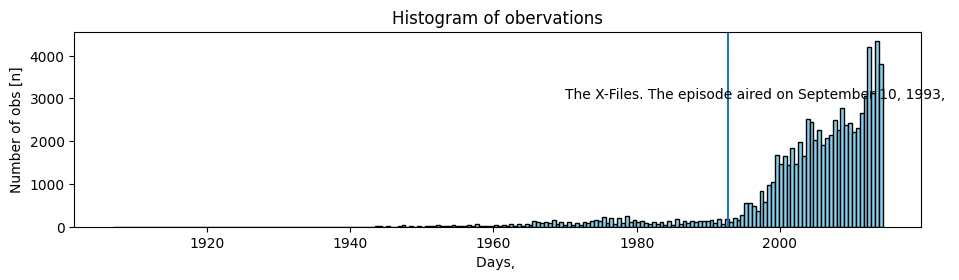

In [58]:
# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Subplot for the 'latitude' column
plt.subplot(2, 1, 1)
plt.hist(unidentified_anomalous_phenomenon['spottingtime'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Days, ')
plt.ylabel('Number of obs [n]')
plt.title('Histogram of obervations')


# Add vertical line
#plt.axvline(x=0.1, color='red', linestyle='--')
plt.axvline(x=8300)
# Add text annotation
plt.text(1, 3000, 'The X-Files. The episode aired on September 10, 1993, ')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


"The War of the Worlds" (radioprogram av Orson Welles) - 1938  
"Närkontakt av tredje graden" (Close Encounters of the Third Kind)  1977     
"ET - den lilla utomjordingen" (E.T. the Extra-Terrestrial) - 1982   
"The X-Files" (TV-serie) - 1993-2002  
"Independence Day" - 1996       
 

## Feature Engineering:
Change +/- 90 to 0-180 and time into days from start. 
Then add 0-1 value, ratio. 

In [7]:
#unidentified_anomalous_phenomenon['spottingUnix'] =  
unidentified_anomalous_phenomenon['spottingUnix'] = unidentified_anomalous_phenomenon['spottingtime'].astype('int64')// 10**9

In [11]:
# Last three year 
california = unidentified_anomalous_phenomenon [  (unidentified_anomalous_phenomenon.state == 'ca') &
                                                    (unidentified_anomalous_phenomenon.spottingtime > '2010') &
                                                    (unidentified_anomalous_phenomenon.latitude < 39) &
                                                    (unidentified_anomalous_phenomenon.latitude > 30) &
                                                    (unidentified_anomalous_phenomenon.longitude > -123) &
                                                    (unidentified_anomalous_phenomenon.longitude < -116)]
#
california.dropna(subset=['latitude'], inplace=True)
california.dropna(subset=['longitude'], inplace=True)
california.index = range(1, len(california) + 1)
#california.latitude.hist (bins=200)

C:\Users\46763\AppData\Local\Temp\ipykernel_17932\2702693234.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california.dropna(subset=['latitude'], inplace=True)
C:\Users\46763\AppData\Local\Temp\ipykernel_17932\2702693234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california.dropna(subset=['longitude'], inplace=True)


In [12]:
california.head (2)

,spottingtime,city,state,country,shape,durationseconds,durationhoursmin,comments,dateposted,latitude,longitude,spottingUnix
1,2010-01-01 00:01:00,spring valley,ca,us,light,600.0,10:00,Three bright red lights in a straight line for...,2010-02-14,32.744722,-116.998056,1262304060
2,2010-01-01 00:01:00,el cajon,ca,us,formation,900.0,15 min.,Three red lights over the San Diego area - IT&...,2010-02-14,32.794722,-116.961667,1262304060


### MinMaxScaler
latitude & longitude 0-1

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Extract latitude and longitude columns
latitude_longitude_data = california[['latitude', 'longitude','spottingUnix']]

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(latitude_longitude_data)

# Create a DataFrame with scaled latitude and longitude
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_latitude', 'scaled_longitude','scaled_spotting'])


scaled_df.index = range(1, len(scaled_df) + 1)


### KMeans

In [38]:
latitude_longitude_data = california[['latitude', 'longitude','spottingUnix']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(latitude_longitude_data)
# Initialize the KMeans model with 100 clusters
kmeans = KMeans(n_clusters=100)

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels
#california['cluster100'] = kmeans.labels_

kmeans_df = pd.DataFrame(kmeans.labels_, columns=['cluster100'])


C:\Users\46763\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
#scaled_df
california = california.join(scaled_df, how='inner')
california = california.join(kmeans_df, how='inner')

In [16]:
california.shape[0]

2512

In [17]:
california[california.cluster100==91].head (2)

,spottingtime,city,state,country,shape,durationseconds,durationhoursmin,comments,dateposted,latitude,longitude,spottingUnix,scaled_latitude,scaled_longitude,scaled_spotting,cluster100
1470,2012-10-06 08:00:00,ocean beach,ca,us,disk,120.0,2 mintues,Orange UFO,2012-10-30,32.744444,-117.261111,1349510400,0.042600,0.825369,0.635659,91
1512,2012-10-29 20:00:00,roseville,ca,us,other,300.0,5 minutes,Orange Orb was silent and not moving until the...,2013-02-04,38.752222,-121.286944,1351540800,0.965315,0.242876,0.650458,91


## Visualization

In [18]:
california.shape [0]

2512

In [19]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

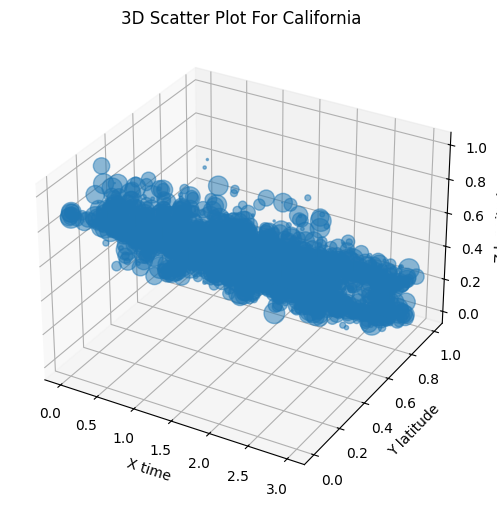

In [20]:
x =  california.scaled_spotting * 3 
y =  california.scaled_latitude 
z =  california.scaled_longitude
colors = california.cluster100

n =  len(california) 
area = np.pi * (15 * np.random.rand(n))**2  # Bubble sizes


# Create the 3D scatter plot
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot greens c= colors cmap=cmap
cmap = cm.Greens
ax.scatter(x, y, z, s=area/3, alpha=0.5)

# Set labels and title
ax.set_xlabel('X time')
ax.set_ylabel('Y latitude')
ax.set_zlabel('Z longitude')
ax.set_title('3D Scatter Plot For California')


plt.show()

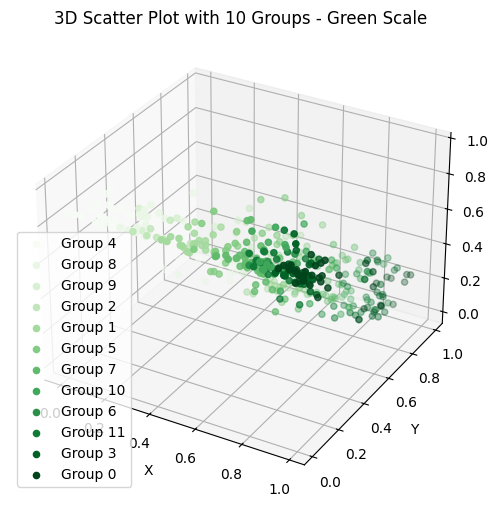

In [26]:
californiaTen = california[california.cluster100 <= 11]
data = californiaTen [['scaled_spotting','scaled_latitude','scaled_longitude','cluster100']]
df = pd.DataFrame(data)
df.columns =['x', 'y', 'z', 'group']



# Create a 3D plot
fig = plt.figure(figsize=(20, 6))
plt.rcParams['figure.figsize'] = [4, 4]
ax = fig.add_subplot(111, projection='3d')

# Define colors for each group using green scale
num_groups = len(df['group'].unique())
colors = plt.cm.Greens(np.linspace(0, 1, num_groups))

# Plot each point with color based on group
for group, color in zip(df['group'].unique(), colors):
    group_df = df[df['group'] == group]
    ax.scatter(group_df['x'], group_df['y'], group_df['z'], c=[color], label=f'Group {group}')

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot with 10 Groups - Green Scale')
ax.legend()

# Show the plot
plt.show()


## Natural Language Processing (NLP)
For each cluster comapring text can i be the same obervation 

### Import Lib 2
 1938

In [78]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
ufo_comments1 = "Three bright red lights in a straight line formation"
ufo_comments2 = "3 red lights in sky new years 2010"
# Load the English NLP model from spaCy
nlp = spacy.load("en_core_web_sm")

# Process the CV texts
ufo_doc1 = nlp(ufo_comments1)
ufo_doc2 = nlp(ufo_comments2)

# Compare similarity between CVs
similarity_score = ufo_doc1.similarity(ufo_doc2)

print(f"Similarity Score: {similarity_score}")

Similarity Score: 0.6348914393799053


C:\Users\46763\AppData\Local\Temp\ipykernel_17932\4150303979.py:11: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_score = ufo_doc1.similarity(ufo_doc2)


In [103]:
# Function to calculate similarity between two texts
def calculate_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)

# Function to extract first 14 words from text
def extract_first_14_words(text):
    return " ".join(text.split()[:14])

In [104]:
california87 = california[california.cluster100 == 87].head (9)
#california87['rowid']  = california87.index
california87.insert(0, 'rowid', california87.index)
california87= california87[['rowid','comments']]

In [126]:
#california87
#df['index'].astype(str) + ' ' + df['comments'].apply(extract_first_14_words).astype(str)

C:\Users\46763\AppData\Local\Temp\ipykernel_17932\1876304709.py:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(doc2)


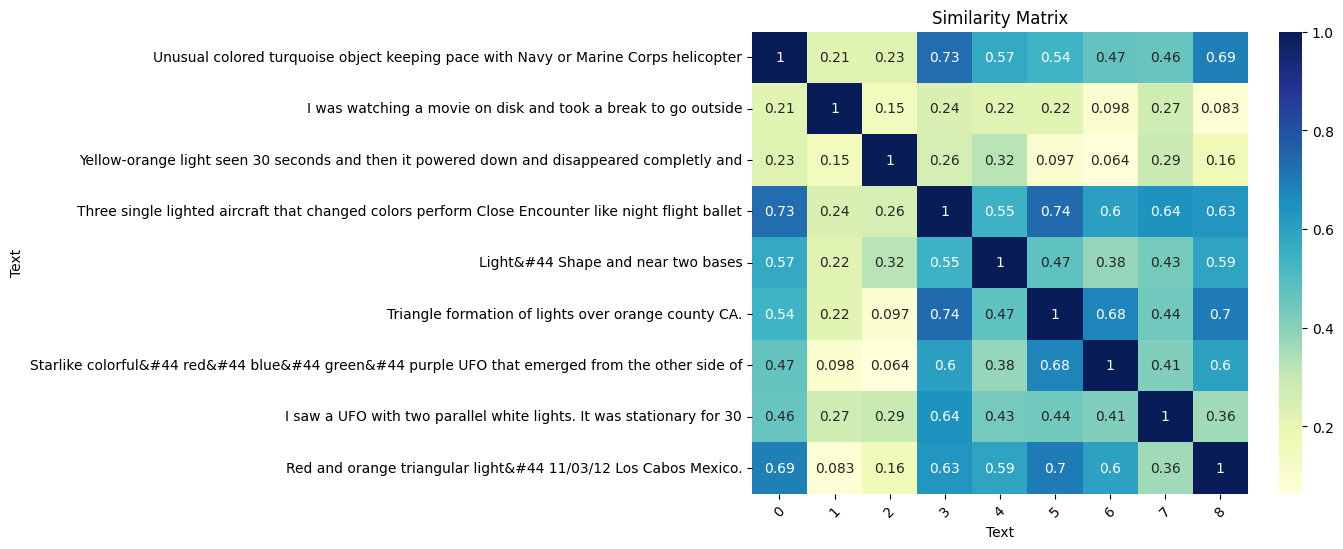

In [127]:
# Load the English language model
nlp = spacy.load("en_core_web_sm")


df = california87
df.reset_index(drop=True, inplace=True)
# Apply the function to create new row labels
df['row_labels'] = df['comments'].apply(extract_first_14_words)


# Calculate similarity for each pair of texts
similarities = []
for i in range(len(df)):
    row_similarities = []
    for j in range(len(df)):
        similarity = calculate_similarity(df['comments'][i], df['comments'][j])
        row_similarities.append(similarity)
    similarities.append(row_similarities)

# Convert similarities to DataFrame
similarity_matrix = pd.DataFrame(similarities)

# Plotting the heatmap xticklabels=df['row_labels']
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", yticklabels=df['row_labels'])
plt.title("Similarity Matrix")
plt.xlabel("Text")
plt.ylabel("Text")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Corresponding

In [221]:
california88 = california[california.cluster100 == 88]
#california88 = california88.insert(0, 'rowid', california88.index)
california88 = california88[['comments']]

# Set column names
#df.columns = ['X', 'Y', 'Z']

california88.columns = ['text']
california88['row_number'] = range(1, len(california88) + 1)
california88.reset_index(drop=True, inplace=True)

In [222]:
df = california88
# Function to calculate similarity between two texts
def calculate_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)

# Calculate similarity for each pair of texts
similarities = []
for i in range(len(df)):
    row_similarities = []
    for j in range(len(df)):
        similarity = calculate_similarity(df['text'][i], df['text'][j])
        row_similarities.append(similarity)
    similarities.append(row_similarities)


similarity_matrix = pd.DataFrame(similarities)


C:\Users\46763\AppData\Local\Temp\ipykernel_17932\4094022258.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(doc2)


In [223]:
similarity_matrix = similarity_matrix.replace(1, 0)
# Find the row and column indices of the maximum similarity score
# Find the maximum similarity score for each row
max_similarity_per_row = similarity_matrix.max(axis=1)

# Find the maximum similarity score for each row
max_similarity_per_row = similarity_matrix.max(axis=1)

# Create a list of dictionaries to store the results
max_similarity_results = []

# Loop through each row and collect the results
for row_number, max_similarity in zip(df['row_number'], max_similarity_per_row):
    max_row_index = similarity_matrix.loc[similarity_matrix.iloc[row_number - 1] == max_similarity].index[0]
    max_similarity_results.append({
        'Row Number': row_number,
        'Text': df['text'][row_number - 1],
        'Max Similarity Score': max_similarity,
        'Corresponding Row Number': max_row_index + 1,
        'Corresponding Text': df['text'][max_row_index]
    })

# Convert the list of dictionaries to a DataFrame
corresponding_df = pd.DataFrame(max_similarity_results)


In [225]:
corresponding_df.head (3)

,Row Number,Text,Max Similarity Score,Corresponding Row Number,Corresponding Text
0,1,Night sky suddenly flashes bright blue,0.586162,12,Strange noise&#44 observed a long&#44 spindle ...
1,2,Four military planes monitoring three UFO&#39s...,0.799972,3,Four yellowish lights moving slowly in differe...
2,3,Four yellowish lights moving slowly in differe...,0.799972,2,Four military planes monitoring three UFO&#39s...


In [226]:
californiaOut = california[california.cluster100 == 88]
californiaOut  

,spottingtime,city,state,country,shape,durationseconds,durationhoursmin,comments,dateposted,latitude,longitude,spottingUnix,scaled_latitude,scaled_longitude,scaled_spotting,cluster100
2173,2013-12-06 22:30:00,daly city,ca,us,NaN,3.0,3 seconds,Night sky suddenly flashes bright blue,2013-12-12,37.705833,-122.460833,1386369000,0.804604,0.073028,0.904326,88
2175,2013-12-07 18:30:00,vacaville,ca,us,sphere,1360.0,22:40,Four military planes monitoring three UFO&#39s...,2013-12-12,38.356667,-121.986667,1386441000,0.904563,0.141634,0.904851,88
2179,2013-12-09 21:00:00,redondo beach,ca,us,changing,180.0,3 minutes,Four yellowish lights moving slowly in differe...,2013-12-12,33.849167,-118.387500,1386622800,0.212271,0.662393,0.906176,88
2180,2013-12-11 16:45:00,brea,ca,us,other,180.0,2-3 minutes,A small&#44 very bright object was seen racing...,2013-12-23,33.916667,-117.899167,1386780300,0.222638,0.733050,0.907324,88
2182,2013-12-12 15:45:00,san jose,ca,us,formation,10.0,10 seconds,Bright triangle formation fading away slowly i...,2014-01-30,37.339444,-121.893889,1386863100,0.748331,0.155058,0.907927,88
2204,2013-12-23 17:50:00,san jose (??),ca,us,light,60.0,1 minute,Helicopter pursues/escorts ufo.,2013-12-23,37.339444,-121.893889,1387821000,0.748331,0.155058,0.914910,88
2208,2013-12-24 18:00:00,saratoga,ca,us,sphere,180.0,2-3 minutes,Orange ball of light.,2014-01-10,37.263889,-122.021944,1387908000,0.736727,0.136530,0.915544,88
2216,2013-12-25 20:30:00,sacramento,ca,us,fireball,120.0,few minutes,Red/Orange Fireballs in the Sky.,2014-01-10,38.581667,-121.493333,1388003400,0.939120,0.213014,0.916239,88
2249,2013-12-31 21:50:00,santa barbara,ca,us,light,30.0,30 seconds,Orange ball of light.,2014-01-10,34.420833,-119.697222,1388526600,0.300071,0.472891,0.920053,88
2263,2014-01-01 00:20:00,santa clara,ca,us,sphere,1500.0,25 minutes,Three fiery orange-red orbs&#44 all seen about...,2014-01-10,37.354167,-121.954167,1388535600,0.750592,0.146337,0.920118,88


In [196]:

# Sample DataFrame with six rows and two columns
data = {
    'row_number': [1, 2, 3, 4, 5, 6],
    'text': ['This is the first document',
             'This document is the second document',
             'And this is the third one',
             'Is this the first document?',
             'The last document is the fourth one',
             'This is not similar to any other document']
}

df =pd.DataFrame(data)

# Function to calculate similarity between two texts
def calculate_similarity(text1, text2):
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)

# Calculate similarity for each pair of texts
similarities = []
for i in range(len(df)):
    row_similarities = []
    for j in range(len(df)):
        similarity = calculate_similarity(df['text'][i], df['text'][j])
        row_similarities.append(similarity)
    similarities.append(row_similarities)


similarity_matrix = pd.DataFrame(similarities)


C:\Users\46763\AppData\Local\Temp\ipykernel_17932\368657220.py:18: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(doc2)


,row_number,text
0,1,This is the first document
1,2,This document is the second document
2,3,And this is the third one
3,4,Is this the first document?
4,5,The last document is the fourth one
5,6,This is not similar to any other document


In [218]:
similarity_matrix = similarity_matrix.replace(1, 0)
# Find the row and column indices of the maximum similarity score
# Find the maximum similarity score for each row
max_similarity_per_row = similarity_matrix.max(axis=1)

# Find the maximum similarity score for each row
max_similarity_per_row = similarity_matrix.max(axis=1)

# Create a list of dictionaries to store the results
max_similarity_results = []

# Loop through each row and collect the results
for row_number, max_similarity in zip(df['row_number'], max_similarity_per_row):
    max_row_index = similarity_matrix.loc[similarity_matrix.iloc[row_number - 1] == max_similarity].index[0]
    max_similarity_results.append({
        'Row Number': row_number,
        'Text': df['text'][row_number - 1],
        'Max Similarity Score': max_similarity,
        'Corresponding Row Number': max_row_index + 1,
        'Corresponding Text': df['text'][max_row_index]
    })

# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(max_similarity_results)

# Print the DataFrame
corresponding_df = result_df

In [154]:
# 
similarity_matrix = similarity_matrix.replace(1, 0)
# Find the row and column indices of the maximum similarity score
max_similarity_score = similarity_matrix.max().max()
max_similarity_indices = similarity_matrix.stack().index[similarity_matrix.stack() == max_similarity_score]

# Print the row numbers corresponding to the maximum similarity score
for index in max_similarity_indices:
    row1, row2 = index
    print(f"Row {df['row_number'][row1]} and Row {df['row_number'][row2]} have the highest similarity score: {max_similarity_score}")


Row 1 and Row 2 have the highest similarity score: 0.8476618543646753
Row 2 and Row 1 have the highest similarity score: 0.8476618543646753


Row 1 and Row 2 have the highest similarity score: 0.8476618543646753
Row 2 and Row 1 have the highest similarity score: 0.8476618543646753


In [138]:
df = pd.DataFrame({'A': [1, 2, 3],
                   'B': [1, 1, 1],
                   'C': [1, 0, 1]})

# Set rows where all values are equal to 1 to NaN
#df.loc[(df == 1).all(axis=1)] = np.nan
df

,A,B,C
0,1,1,1
1,2,1,0
2,3,1,1


In [140]:
df.loc[(df == 1).all(axis=1)] = np.nan
df

,A,B,C
0,NaN,NaN,NaN
1,2.0,1.0,0.0
2,3.0,1.0,1.0


In [89]:
60*5

300